# Import Library

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


## # Load train and test set from CSV files

In [ ]:

df = pd.read_csv('train.csv')

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (15000, 20)


In [170]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0   0   859.0          Placebo  17841.0   F       N            Y       N   
1   1  1141.0          Placebo  18102.0   F       N            Y       Y   
2   2   853.0  D-penicillamine  16728.0   F       N            Y       Y   
3   3  1785.0  D-penicillamine  19358.0   F       N            Y       N   
4   4  1418.0          Placebo  22306.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        2.1        396.0     3.70    74.0    2148.0  136.74   
1     S        2.1        187.0     3.48     4.0     918.0  120.90   
2     N        5.7        482.0     3.67   161.0   11552.0  136.74   
3     N        2.1        350.0     3.36    74.0     661.0  272.80   
4     S        2.0        426.0     3.74    86.0   13862.4  136.00   

   Tryglicerides  Platelets  Prothrombin  Stage Status  
0          144.0      298.0         11.0    4.0 

In [171]:

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8457 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8464 non-null   object 
 6   Hepatomegaly   8453 non-null   object 
 7   Spiders        8449 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6623 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8338 non-null   float64
 13  Alk_Phos       8450 non-null   float64
 14  SGOT           8446 non-null   float64
 15  Tryglicerides  6574 non-null   float64
 16  Platelets      14462 non-null  float64
 17  Prothrombin    14981 non-null  floa

In [172]:
df.isnull().sum()

id                  0
N_Days              0
Drug             6543
Age                 0
Sex                 0
Ascites          6536
Hepatomegaly     6547
Spiders          6551
Edema               0
Bilirubin           0
Cholesterol      8377
Albumin             0
Copper           6662
Alk_Phos         6550
SGOT             6554
Tryglicerides    8426
Platelets         538
Prothrombin        19
Stage               0
Status              0
dtype: int64

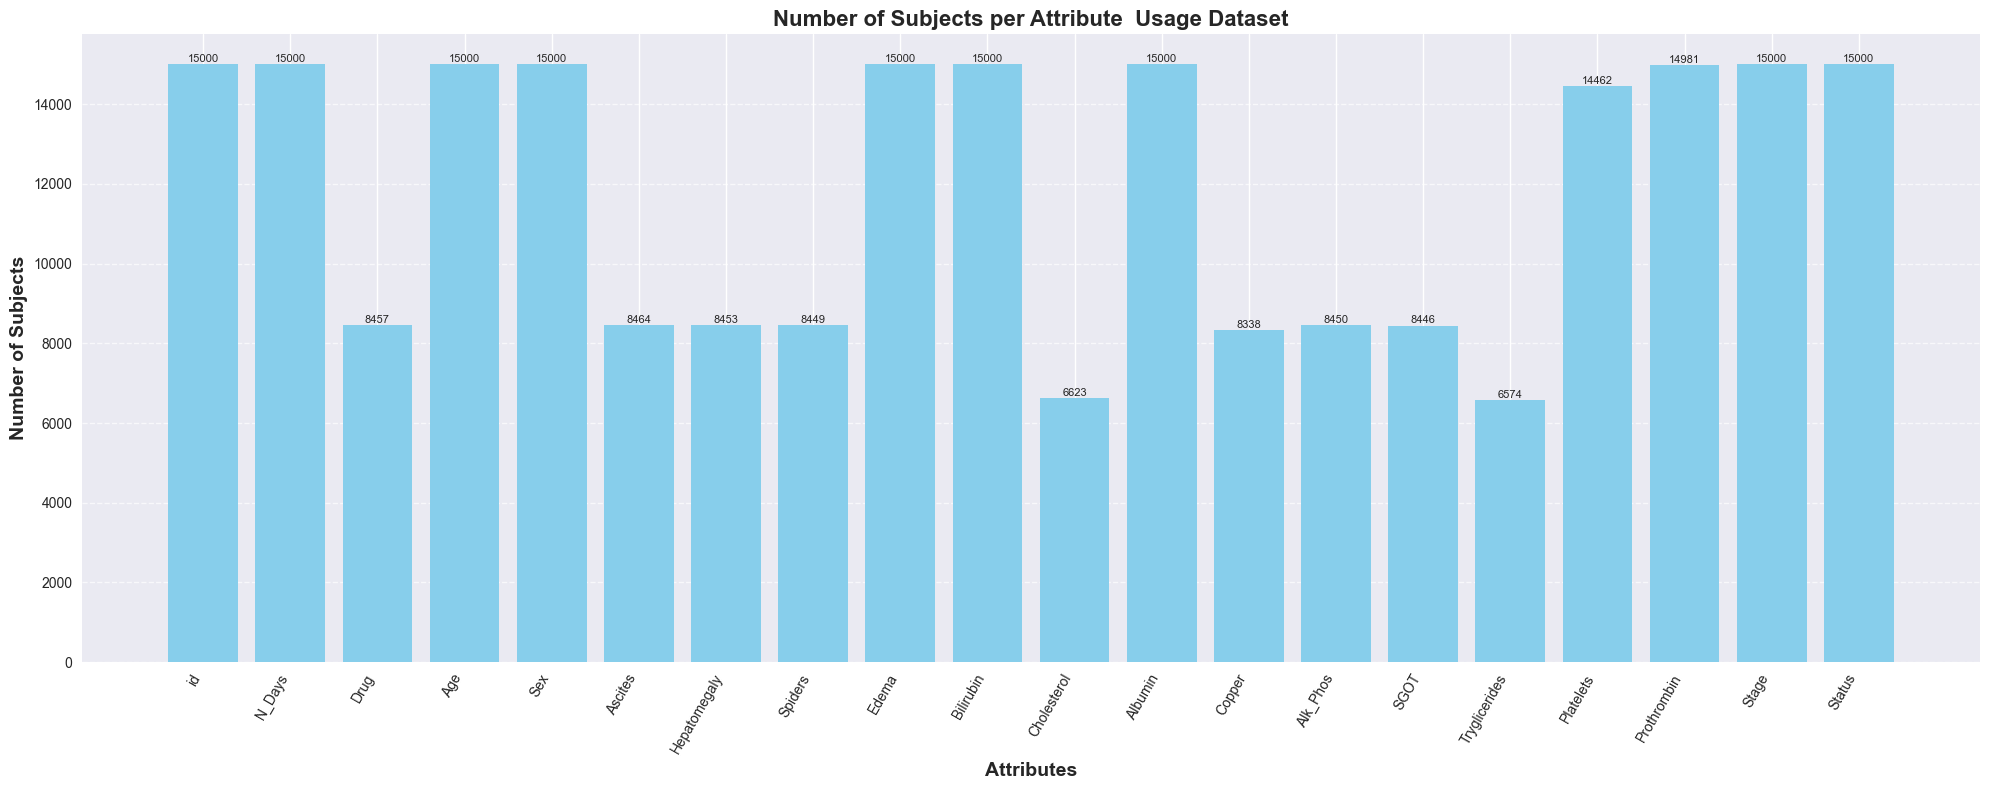

In [173]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute  Usage Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##  Check for missing values

In [174]:

print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])



Missing Values:
Drug             6543
Ascites          6536
Hepatomegaly     6547
Spiders          6551
Cholesterol      8377
Copper           6662
Alk_Phos         6550
SGOT             6554
Tryglicerides    8426
Platelets         538
Prothrombin        19
dtype: int64


## Display basic statistics

In [175]:

print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                 id       N_Days          Age     Bilirubin  Cholesterol  \
count  15000.000000  15000.00000  15000.00000  15000.000000  6623.000000   
mean    7499.500000   1961.48832  19297.11602      1.873353   326.345342   
std     4330.271354   1269.33249   3676.91184      2.821977   188.022395   
min        0.000000      3.00000    133.30000      0.300000    66.000000   
25%     3749.750000   1095.00000  16714.00000      0.600000   242.000000   
50%     7499.500000   1783.00000  19358.00000      0.900000   280.000000   
75%    11249.250000   2624.00000  22369.00000      1.800000   353.000000   
max    14999.000000  25340.00000  92111.00000     53.000000  3456.200000   

            Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  15000.000000  8338.000000   8450.000000  8446.000000    6574.000000   
mean       3.521489    75.533329   1635.588473   105.608583     109.534074   
std        0.376376    76.301928   1823.745780    49.984298   

## Exploratory Data Analysis

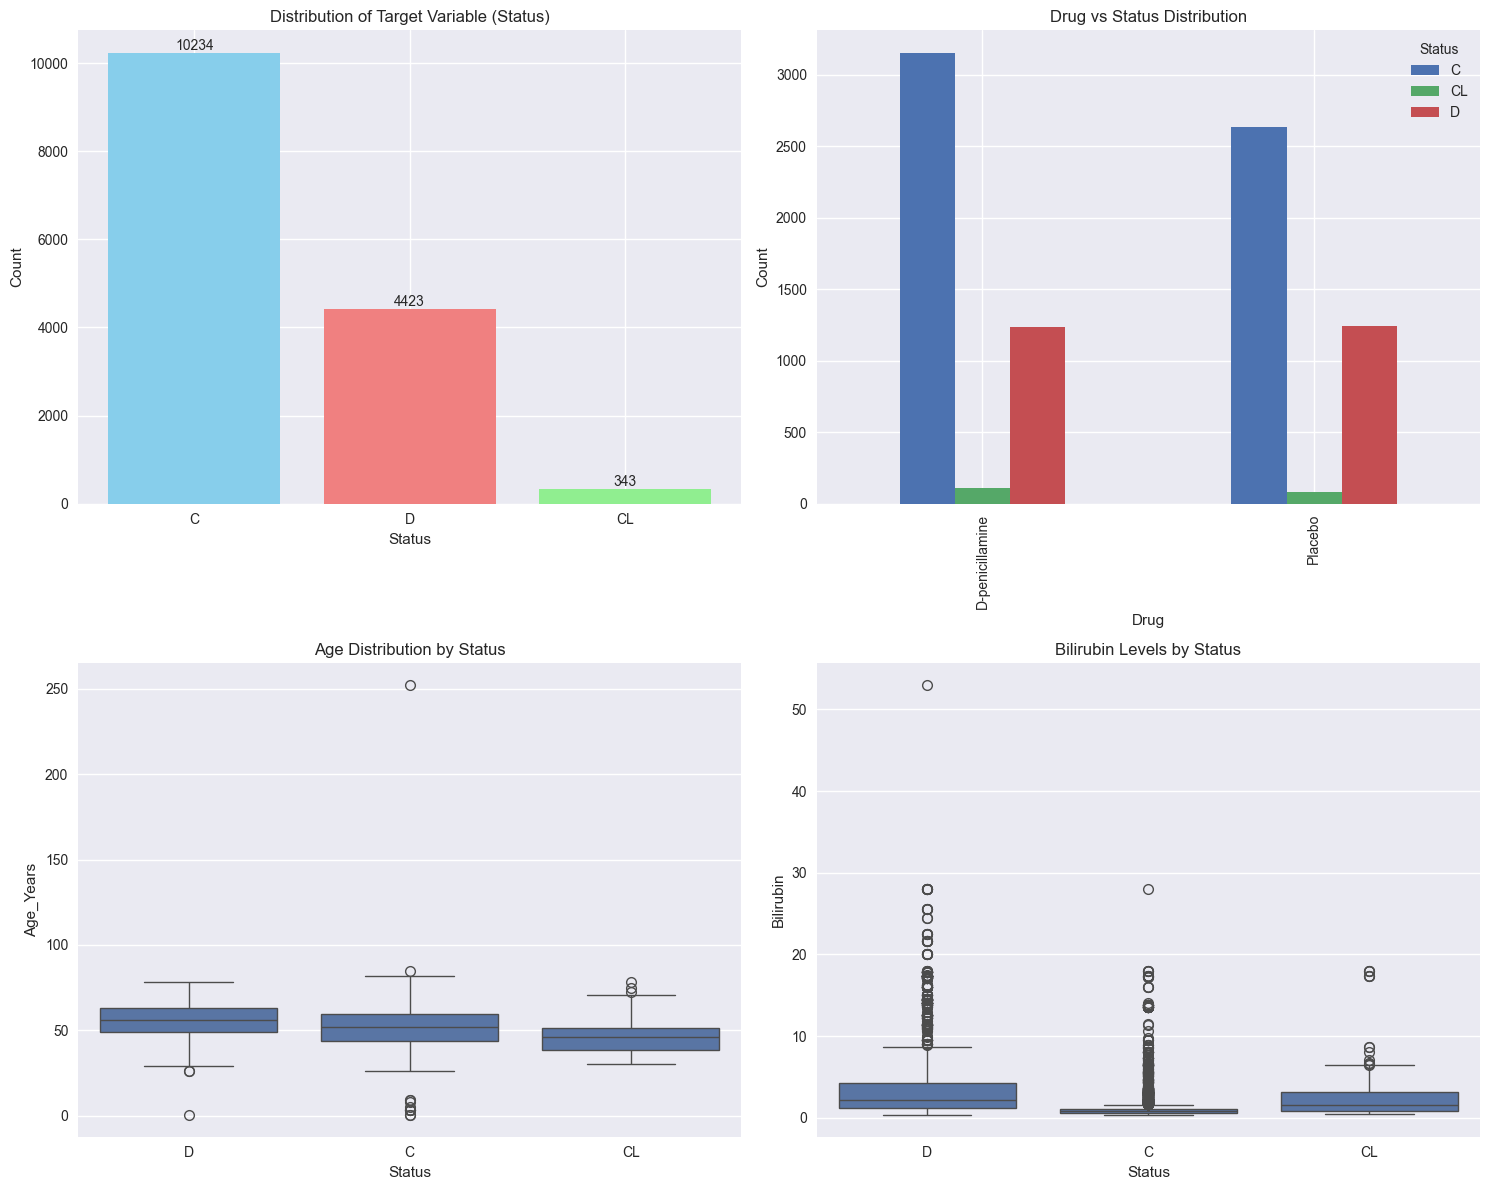

In [176]:

plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target variable distribution
status_counts = df['Status'].value_counts()
axes[0,0].bar(status_counts.index, status_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Distribution of Target Variable (Status)')
axes[0,0].set_xlabel('Status')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(status_counts.values):
    axes[0,0].text(i, v, str(v), ha='center', va='bottom')

# 2. Drug vs Status
drug_status = pd.crosstab(df['Drug'], df['Status'])
drug_status.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Drug vs Status Distribution')
axes[0,1].set_xlabel('Drug')
axes[0,1].set_ylabel('Count')

# 3. Age distribution by Status (converting from days to years)
df['Age_Years'] = df['Age'] / 365.25
sns.boxplot(data=df, x='Status', y='Age_Years', ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Status')

# 4. Bilirubin by Status
sns.boxplot(data=df, x='Status', y='Bilirubin', ax=axes[1,1])
axes[1,1].set_title('Bilirubin Levels by Status')

plt.tight_layout()
plt.show()

## Correlation matrix for numerical features

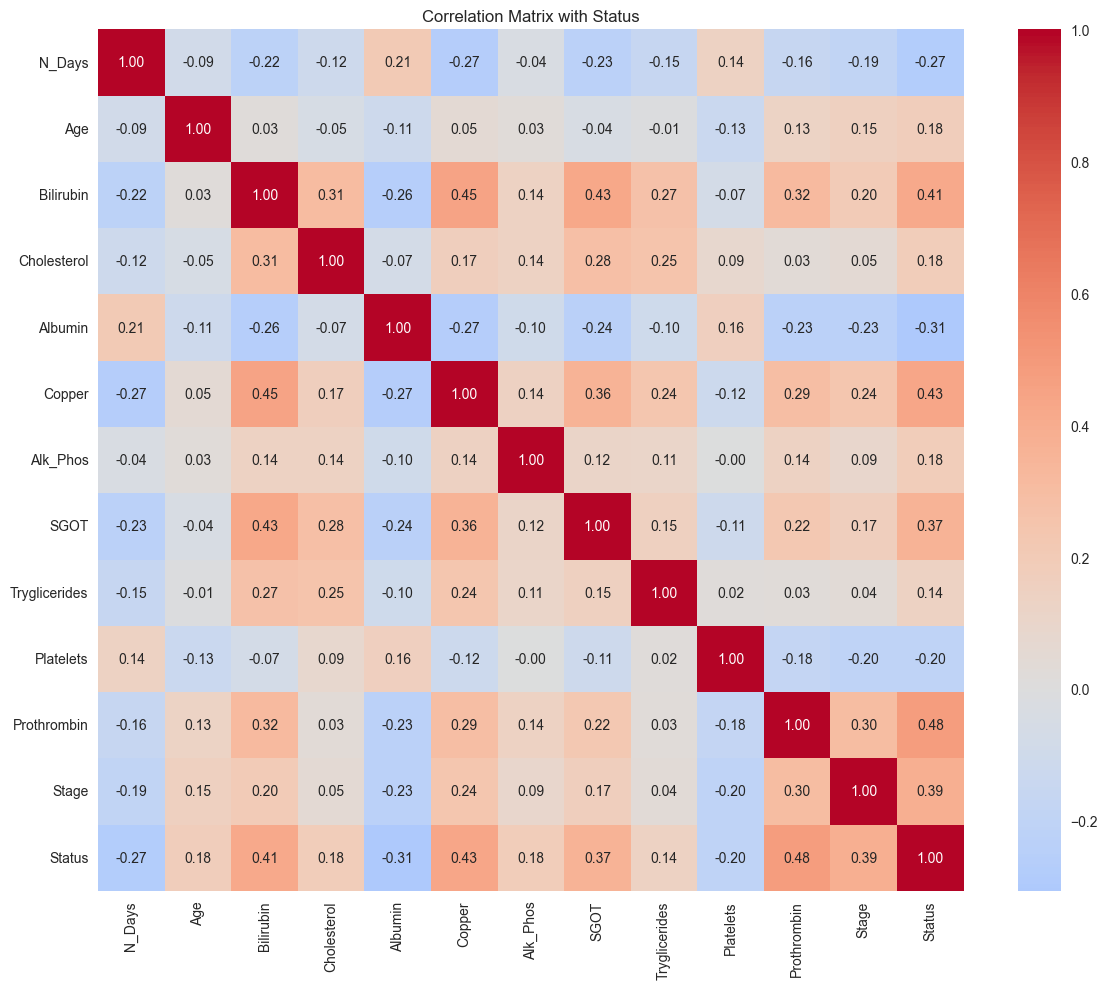

Correlations with Status:
Status           1.000000
Prothrombin      0.478135
Copper           0.432171
Bilirubin        0.414971
Stage            0.387564
SGOT             0.367136
Cholesterol      0.184936
Alk_Phos         0.181978
Age              0.177856
Tryglicerides    0.141711
Platelets       -0.204525
N_Days          -0.272836
Albumin         -0.306165
Name: Status, dtype: float64


In [177]:

numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create a copy for correlation analysis
df_corr = df.copy()

# Encode Status for correlation
status_map = {'C': 0, 'CL': 1, 'D': 2}
df_corr['Status'] = df_corr['Status'].map(status_map)

plt.figure(figsize=(12, 10))
correlation_matrix = df_corr[numerical_cols + ['Status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix with Status')
plt.tight_layout()
plt.show()

# Show correlations with Status
print("Correlations with Status:")
status_correlations = correlation_matrix['Status'].sort_values(ascending=False)
print(status_correlations)

# Map Status to numeric codes for coloring

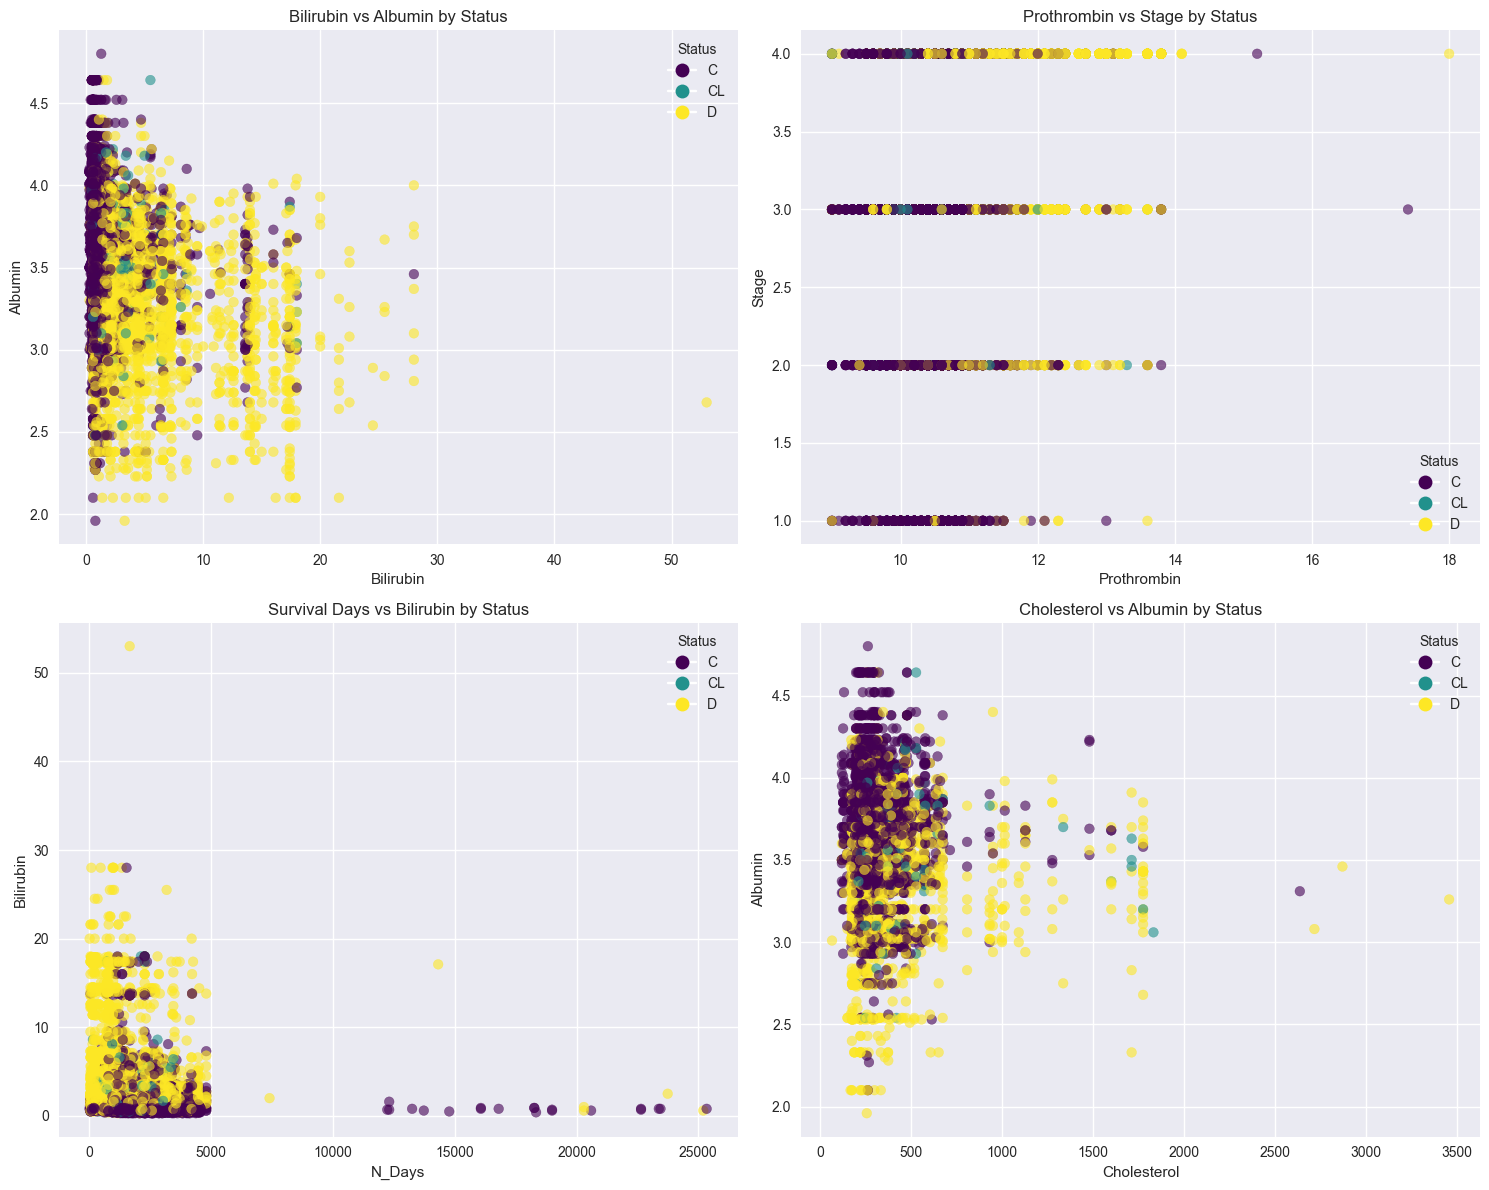

In [ ]:

status_map = {'C': 0, 'CL': 1, 'D': 2}
status_numeric = df['Status'].map(status_map)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define a list to link legend colors to actual labels
status_labels = ['C', 'CL', 'D']

# 1. Bilirubin vs Albumin colored by Status
scatter = axes[0,0].scatter(df['Bilirubin'], df['Albumin'], c=status_numeric, 
                           cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Bilirubin')
axes[0,0].set_ylabel('Albumin')
axes[0,0].set_title('Bilirubin vs Albumin by Status')

# Add correct legend for Status
handles = []
for i, lbl in enumerate(status_labels):
    handles.append(
        plt.Line2D(
            [], [], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), markersize=10, label=lbl,
        )
    )
axes[0,0].legend(handles=handles, title="Status")

# 2. Prothrombin vs Stage colored by Status
scatter = axes[0,1].scatter(df['Prothrombin'], df['Stage'], c=status_numeric, 
                           cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Prothrombin')
axes[0,1].set_ylabel('Stage')
axes[0,1].set_title('Prothrombin vs Stage by Status')
axes[0,1].legend(handles=handles, title="Status")

# 3. N_Days vs Bilirubin colored by Status
scatter = axes[1,0].scatter(df['N_Days'], df['Bilirubin'], c=status_numeric, 
                           cmap='viridis', alpha=0.6)
axes[1,0].set_xlabel('N_Days')
axes[1,0].set_ylabel('Bilirubin')
axes[1,0].set_title('Survival Days vs Bilirubin by Status')
axes[1,0].legend(handles=handles, title="Status")

# 4. Cholesterol vs Albumin colored by Status
scatter = axes[1,1].scatter(df['Cholesterol'], df['Albumin'], c=status_numeric, 
                           cmap='viridis', alpha=0.6)
axes[1,1].set_xlabel('Cholesterol')
axes[1,1].set_ylabel('Albumin')
axes[1,1].set_title('Cholesterol vs Albumin by Status')
axes[1,1].legend(handles=handles, title="Status")

plt.tight_layout()
plt.show()

## Data Cleaning & Preprocessing

In [ ]:

def preprocess_data(df, is_training=True):
    df_processed = df.copy()
    
    # Handle missing values
    # For numerical columns, use median imputation
    numerical_cols = ['Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
                     'Tryglicerides', 'Platelets', 'Prothrombin']
    
    # For categorical columns, use mode imputation
    categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
    
    # Impute numerical columns
    num_imputer = SimpleImputer(strategy='median')
    df_processed[numerical_cols] = num_imputer.fit_transform(df_processed[numerical_cols])
    
    # Impute categorical columns
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_processed[categorical_cols] = cat_imputer.fit_transform(df_processed[categorical_cols])
    
    # Feature Engineering
    # Create age in years
    df_processed['Age_Years'] = df_processed['Age'] / 365.25
    
    # Create bilirubin to albumin ratio (important liver function indicator)
    df_processed['Bilirubin_Albumin_Ratio'] = df_processed['Bilirubin'] / df_processed['Albumin']
    
    # Create prothrombin time indicator
    df_processed['High_Prothrombin'] = (df_processed['Prothrombin'] > 12).astype(int)
    
    # Stage severity indicator
    df_processed['Late_Stage'] = (df_processed['Stage'] >= 3).astype(int)
    
    # Encode categorical variables
    categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
    for col in categorical_features:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
    
    # Select final features
    feature_columns = numerical_cols + ['N_Days', 'Stage', 'Age_Years', 
                                      'Bilirubin_Albumin_Ratio', 'High_Prothrombin', 
                                      'Late_Stage'] + [col + '_encoded' for col in categorical_features]
    
    if is_training:
        X = df_processed[feature_columns]
        y = df_processed['Status']
        return X, y, df_processed
    else:
        X = df_processed[feature_columns]
        return X, df_processed

# Preprocess the training data
X, y, df_processed = preprocess_data(df)

# Check class distribution and handle imbalance

In [180]:

print("Class distribution:")
print(y.value_counts())

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print(f"\nClass weights: {class_weight_dict}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Class distribution:
Status
C     10234
D      4423
CL      343
Name: count, dtype: int64

Class weights: {'C': np.float64(0.4885675200312683), 'CL': np.float64(14.577259475218659), 'D': np.float64(1.1304544426859597)}
Training set size: (12000, 20)
Test set size: (3000, 20)


# Model Building & Training

In [181]:

from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode target if it is not numeric
if y_train.dtype == 'O' or not np.issubdtype(y_train.dtype, np.number):
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    target_encoder_used = True
else:
    y_train_enc = y_train
    y_test_enc = y_test
    target_encoder_used = False

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=200, random_state=42, 
                                eval_metric='mlogloss', use_label_encoder=False),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # For XGBoost, use encoded labels if string labels present
    if name == 'XGBoost' and target_encoder_used:
        model.fit(X_train_scaled, y_train_enc)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
        # Decode predictions to original labels for consistency
        y_pred = le.inverse_transform(y_pred)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': (y_pred == y_test).mean()
    }
    
    print(f"{name} Accuracy: {results[name]['accuracy']:.4f}")


Training Random Forest...
Random Forest Accuracy: 0.8533

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8597

Training XGBoost...
XGBoost Accuracy: 0.8560

Training Logistic Regression...
Logistic Regression Accuracy: 0.7170



Best Model: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

           C       0.88      0.93      0.91      2047
          CL       0.52      0.16      0.24        69
           D       0.81      0.75      0.78       884

    accuracy                           0.86      3000
   macro avg       0.74      0.61      0.64      3000
weighted avg       0.85      0.86      0.85      3000



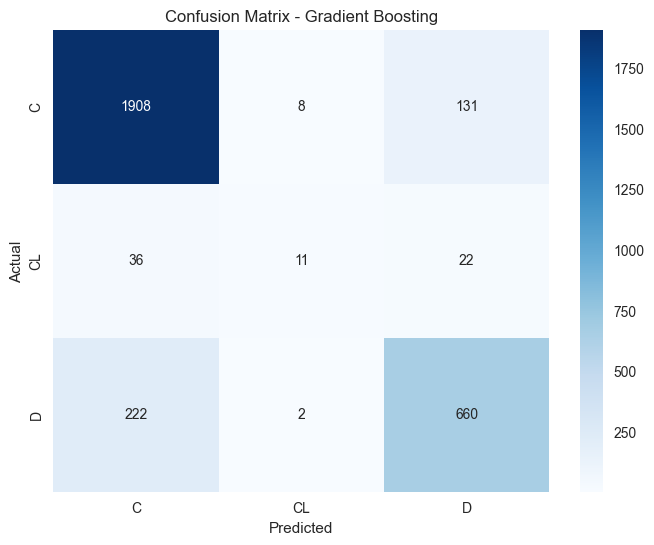

In [182]:
# Classification Report and Confusion Matrix for best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Curve

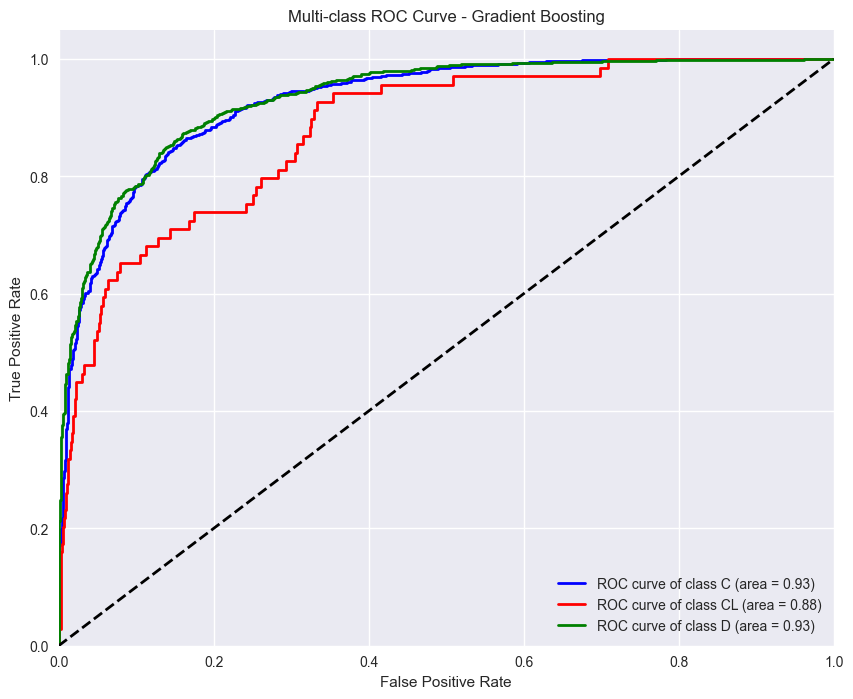

ROC AUC Scores:
Class C: 0.9282
Class CL: 0.8785
Class D: 0.9339


In [183]:

from sklearn.preprocessing import label_binarize

# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Get probabilities for best model
if hasattr(best_model, 'predict_proba'):
    y_score = best_model.predict_proba(X_test_scaled)
else:
    # For models that don't have predict_proba, use decision function
    y_score = best_model.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve of class {list(np.unique(y))[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Multi-class ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Scores:")
for i, class_name in enumerate(np.unique(y)):
    print(f"Class {class_name}: {roc_auc[i]:.4f}")

# Cross-Validation Report

Cross-Validation Results:
Random Forest: 0.8567 (+/- 0.0043)
Gradient Boosting: 0.8639 (+/- 0.0072)
XGBoost: 0.8568 (+/- 0.0080)
Logistic Regression: 0.7114 (+/- 0.0206)


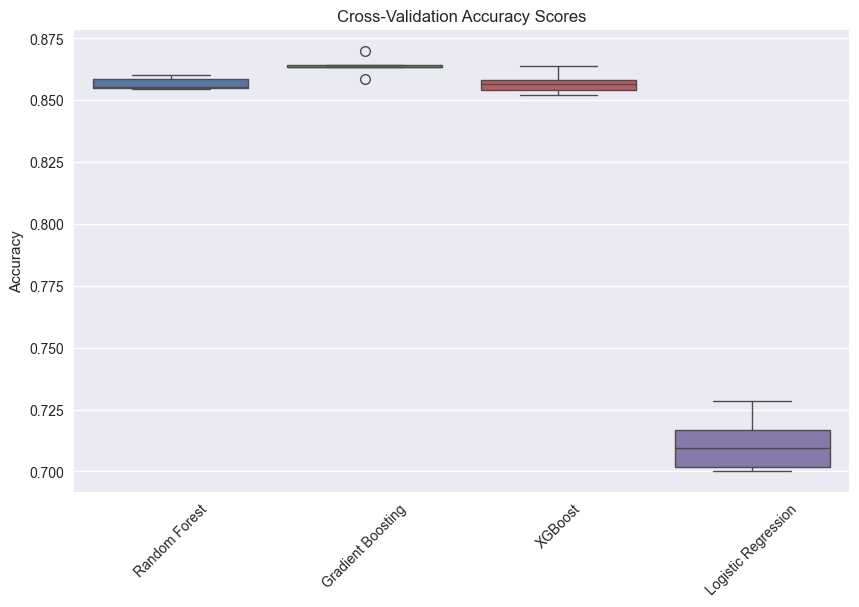

In [184]:
from sklearn.preprocessing import LabelEncoder

print("Cross-Validation Results:")
cv_scores = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Encode target labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

for name, model in models.items():
    # Use the same preprocessing in CV
    X_scaled = scaler.fit_transform(X)
    try:
        cv_score = cross_val_score(model, X_scaled, y_encoded, cv=cv, scoring='accuracy')
        cv_scores[name] = cv_score
        print(f"{name}: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")
    except ValueError as e:
        print(f"{name}: Error during cross-validation - {e}")

# Plot CV results
if len(cv_scores) > 0:
    plt.figure(figsize=(10, 6))
    cv_df = pd.DataFrame(cv_scores)
    sns.boxplot(data=cv_df)
    plt.title('Cross-Validation Accuracy Scores')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No models could be cross-validated.")


# Feature Importance for tree-based models

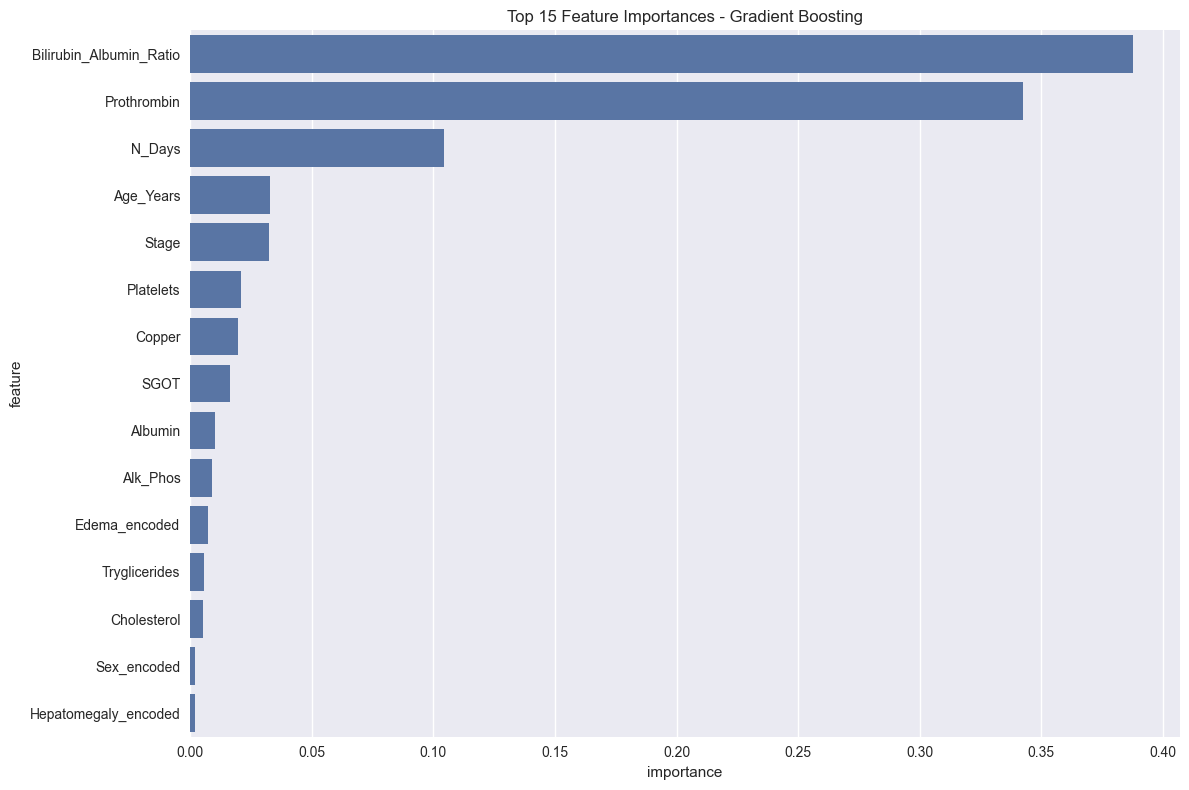

In [185]:

if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Final Model Training on Full Dataset

In [186]:

print("\nTraining final model on full dataset...")

# Use the best model
final_model = best_model

# Preprocess and scale full dataset
X_full_scaled = scaler.fit_transform(X)

# Train final model on full data
final_model.fit(X_full_scaled, y)

print("Final model trained successfully!")


Training final model on full dataset...
Final model trained successfully!


# Prepare submission for test data


In [187]:
# Load test data
test_df = pd.read_csv('test.csv')

# Preprocess test data
X_test_submission, test_df_processed = preprocess_data(test_df, is_training=False)

# Scale test features
X_test_submission_scaled = scaler.transform(X_test_submission)

# Predict probabilities
test_probabilities = final_model.predict_proba(X_test_submission_scaled)

# Create submission dataframe
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Status_C': test_probabilities[:, np.where(final_model.classes_ == 'C')[0][0]],
    'Status_CL': test_probabilities[:, np.where(final_model.classes_ == 'CL')[0][0]],
    'Status_D': test_probabilities[:, np.where(final_model.classes_ == 'D')[0][0]]
})

# Ensure probabilities sum to 1
submission_df[['Status_C', 'Status_CL', 'Status_D']] = submission_df[['Status_C', 'Status_CL', 'Status_D']].div(
    submission_df[['Status_C', 'Status_CL', 'Status_D']].sum(axis=1), axis=0)

print("Submission sample:")
print(submission_df.head())

# Save submission file
submission_df.to_csv('cirrhosis_predictions.csv', index=False)
print("\nSubmission file saved as 'cirrhosis_predictions.csv'")

Submission sample:
      id  Status_C  Status_CL  Status_D
0  15000  0.951394   0.006566  0.042040
1  15001  0.979326   0.002223  0.018451
2  15002  0.769656   0.025511  0.204832
3  15003  0.019034   0.001411  0.979555
4  15004  0.945608   0.002538  0.051853

Submission file saved as 'cirrhosis_predictions.csv'


# Final summary

In [188]:

print("\n=== MODEL SUMMARY ===")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Cross-Validation Mean Accuracy: {cv_scores[best_model_name].mean():.4f}")
print(f"Number of Features: {X.shape[1]}")
print(f"Classes: {list(np.unique(y))}")
print("\nClass Distribution in Training:")
print(y.value_counts())


=== MODEL SUMMARY ===
Best Model: Gradient Boosting
Test Accuracy: 0.8597
Cross-Validation Mean Accuracy: 0.8639
Number of Features: 20
Classes: ['C', 'CL', 'D']

Class Distribution in Training:
Status
C     10234
D      4423
CL      343
Name: count, dtype: int64
